# Investing On ETFs Using The Kelly Formula Part 1

## How To Retrieve ETF Data Using Python 

## Introduction
...

## Exchange Traded Fund (ETF)
...

## Vanguard
...


### Jack Bogle
...


### Vanguard ETFs
...


## Retrieve Vanguard ETFs Data
1. Source Vanguard ETFs list of tickers.
2. Source Vanguard ETFs historical OHLCV data.

## Source Vanguard ETFs List Of Tickers
In this section, we retrieve tickers of every ETF on Vanguard's website.
We use Selenium, a web browser automation tool, to help us retrieve the ETF tickers.
We propose two approaches, direct and indirect, of sourcing ETF ticker data from website.

### Selenium
[Selenium](https://www.seleniumhq.org) automates web browsers.
Selenium was initially conceived for automation of web application testing.
It allows you to open a browser and automate actions like clicking buttons and completing forms.

I propose two ways of using Selenium scrape of ETF ticker data:
1. An automated approach: We automate navigation of Vanguard's web site by going from the home page to the ETF list page containing the tickers.
2. A non-automated approach: We go directly to the ETF list page containing the tickers.

Import packages

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import pandas_datareader as web
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

### Automated Approrach
Code for scraping ETF tickers from Vanguard's home page using the first approach.

In [2]:
# # Option
# option = webdriver.ChromeOptions()
# option.add_argument('--incognito')


# # Create a Chrome webdriver 
# driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# # Get to the Vanguard home page
# driver.get('https://investor.vanguard.com/home/')

# # Set delay in seconds
# delay = 10 


# # Head to the next page by clicking on 'Investing'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Investing')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# driver.find_element_by_link_text('Investing').click()


# # Head to the next page by clicking on 'Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Vanguard ETFs')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# driver.find_element_by_link_text('Vanguard ETFs').click()

# # Head to the next page by clicking on 'Browse a list of Vanguard ETFs'
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.LINK_TEXT, 'Browse a list of Vanguard ETFs')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# driver.find_element_by_partial_link_text('Browse a list of Vanguard ETFs').click()


# # Source the Vanguard ETF names and tickers
# try:
#     WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
# except TimeoutException:
#     print("Timed out waiting for page to load.")
#     driver.quit()

# content = driver.find_elements_by_class_name('productEntry')

### Non-automated Approach
Code for scraping ETF tickers from Vanguard's ETF list page.

In [3]:
# Option
option = webdriver.ChromeOptions()
option.add_argument('--incognito')

# Create a Chrome webdriver 
driver = webdriver.Chrome('/Applications/chromedriver', options=option)

# Get to the Vanguard home page
driver.get('https://investor.vanguard.com/etf/list#/etf/asset-class/month-end-returns')

# Set delay in seconds
delay = 10

try:
    WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'productEntry')))
    # Source the Vanguard ETF names and tickers
    content = driver.find_elements_by_class_name('productEntry')
except TimeoutException:
    print("Timed out waiting for page to load.")
    driver.quit()

### Vanguard ETFs

Inspect the content collected

In [4]:
len(content)

118

In [5]:
for i in content:
    print(i.text)














Total Corporate Bond ETF
Vanguard Select Funds
Tax-Exempt Bond ETF
Dividend Appreciation ETF
ESG U.S. Stock ETF
Growth ETF
High Dividend Yield ETF
Large-Cap ETF
Mega Cap ETF
Mega Cap Growth ETF
Mega Cap Value ETF
Vanguard Select Funds
S&P 500 ETF
Vanguard Select Funds
Total Stock Market ETF
Value ETF
Vanguard Select Funds
Extended Market ETF
Mid-Cap ETF
Mid-Cap Growth ETF
Mid-Cap Value ETF
Small-Cap ETF
Small-Cap Growth ETF
Small-Cap Value ETF
Total World Bond ETF
Vanguard Select Funds
Total International Bond ETF
Emerging Markets Government Bond ETF
Total World Stock ETF
ESG International Stock ETF
FTSE All-World ex-US ETF
FTSE All-World ex-US Small-Cap ETF
Vanguard Select Funds
FTSE Developed Markets ETF
FTSE Europe ETF
FTSE Pacific ETF
Global ex-U.S. Real Estate ETF
International Dividend Appreciation ETF
International High Dividend Yield ETF
Vanguard Select Funds
Total International Stock ETF
Vanguard Select Funds
FTSE Emerging Markets ETF
Communication Services ETF
Co

We notice the following structure:
1. Elements 0-58 are the names of the ETFs.
2. Elements 59-118 are the tickers, asset class, etc. of the ETFs.

Create lists to hold ETF names and tickers

In [6]:
# Initialize the lists
etf_names = []
etf_tickers = []

for i in range(0, 59):
    # Get the names
    try:
        etf_names.append(content[i].text.split('\n')[1])
    except IndexError:
        etf_names.append(content[i].text)
    
    # Get the tickers
    etf_tickers.append(content[i + 59].text.split()[0])

Create a DataFrame mapping an ETF's name to it's ticker

In [7]:
etf_map = pd.DataFrame({'Name': etf_names,
                        'Ticker': etf_tickers})

### Vanguard ETFs By Group

Vanguard US Bond ETFs

In [8]:
etf_us_bonds_map = etf_map.iloc[0:15]

Vanguard US Stock ETFs

In [9]:
etf_us_stocks_map = etf_map.iloc[15:33]

Vanguard International Bond ETFs

In [10]:
etf_intl_bonds_map = etf_map.iloc[33:36]

Vanguard International Stock ETFs

In [11]:
etf_intl_stocks_map = etf_map.iloc[36:48]

Vanguard Sector ETFs

In [12]:
etf_sectors_map = etf_map.iloc[48:]

## Source Vanguard ETFs Historical OHLCV Data

Set parameters

In [13]:
source = 'iex'

In [14]:
start = '2014-06-01'

In [15]:
end = '2019-06-01'

### Vanguard ETFs

Pull historical OHLCV data from the Investors Exchange

In [16]:
# List of tickers
etf_list = etf_map['Ticker'].tolist()

# Initialize data
etf_data = web.DataReader(etf_list[0], source, start, end)
# Conver index to datetime
etf_data.index = pd.to_datetime(etf_data.index)

for i in range(1, len(etf_list)):
    # Pull new data
    temp_data = web.DataReader(etf_list[i], source, start, end)
    
    # Update data
    etf_data = pd.concat([etf_data, temp_data], axis=1, sort=True)
    
# Set multi-level columns
etf_data.columns = pd.MultiIndex.from_product([etf_list, temp_data.columns])

Check

In [17]:
etf_data.head()

EDV                                        BIV           \
               open     high      low    close volume     open     high   
date                                                                      
2014-06-06  86.1829  86.4897  85.4306  85.5692  38528  72.3886  72.4049   
2014-06-09  85.4117  85.5767  85.0727  85.2873  25658  72.1914  72.1914   
2014-06-10  84.8229  85.1877  84.6819  84.8478  18255  72.0456  72.0799   
2014-06-11  85.3252  85.4117  84.5078  85.2044  93263  72.0370  72.1399   
2014-06-12  85.2790  86.4896  84.7732  86.2077  34454  72.1485  72.3372   

                                      ...        VNQ                    \
                low    close  volume  ...       open     high      low   
date                                  ...                                
2014-06-06  72.1828  72.2514  295038  ...    61.9943  61.9943  61.3322   
2014-06-09  72.0658  72.1571  184685  ...    61.5098  61.6471  60.5892   
2014-06-10  71.9684  72.0541  400619  ...    60.6538  60.7184  60.0320   
2014-06-11  72.0031  72.0970  172010  ...    60.0078  60.3470  59.7930   
2014-06-12  72.0884  72.3372  325751  ...    60.0805  60.1289  59.4764   

                                  VPU                                    
              close   volume     open     high      low    close volume  
date                                                                     
2014-06-06  61.4452  9927226  80.2419  80.4650  79.7666  79.7921  73705  
2014-06-09  60.7023  2468057  79.7072  79.9363  79.2404  79.3507  75050  
2014-06-10  60.2501  2614973  79.3252  79.5289  78.9772  79.1131  83998  
2014-06-11  60.0885  2365893  78.8160  78.9772  78.1879  78.1879  94691  
2014-06-12  59.9351  2249588  78.0776  78.5698  77.2797  78.4256  96214  

[5 rows x 295 columns]

In [18]:
etf_data.tail()

EDV                                         BIV           \
              open      high      low   close  volume     open     high   
date                                                                      
2019-05-24  121.34  121.5800  121.115  121.58  139433  84.2470  84.2869   
2019-05-28  122.25  123.0500  121.980  122.81  148743  84.4166  84.5662   
2019-05-29  124.10  124.4600  123.080  123.13  403776  84.6859  84.7224   
2019-05-30  123.43  124.8996  123.090  124.76   71387  84.5163  84.7857   
2019-05-31  125.77  127.0600  125.500  126.86  219580  84.9553  85.2011   

                                        ...      VNQ                       \
                low    close   volume   ...     open   high    low  close   
date                                    ...                                 
2019-05-24  84.1672  84.2470   459244   ...    88.02  88.47  87.99  88.06   
2019-05-28  84.3817  84.5562  1276385   ...    88.33  88.59  87.14  87.19   
2019-05-29  84.4764  84.4964   585810   ...    87.06  87.21  85.71  86.03   
2019-05-30  84.4734  84.7857   613085   ...    86.12  86.78  86.03  86.39   
2019-05-31  84.8690  85.1947   837244   ...    86.16  87.37  85.89  86.89   

                        VPU                                    
             volume    open      high     low   close  volume  
date                                                           
2019-05-24  3121804  133.36  133.9300  132.89  133.01   94766  
2019-05-28  4614457  133.33  133.3300  130.75  130.91  204980  
2019-05-29  8170001  131.20  131.2600  128.84  129.12  121633  
2019-05-30  3984143  129.25  129.7500  128.39  128.83  174235  
2019-05-31  5369175  128.78  129.8122  128.39  129.58  194260  

[5 rows x 295 columns]

In [19]:
etf_data.describe()

EDV                                                       \
              open         high          low        close        volume   
count  1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03   
mean    107.772204   108.337382   107.191516   107.764597  8.416261e+04   
std       8.515166     8.510991     8.515686     8.522394  1.001039e+05   
min      83.909100    84.795700    83.641400    84.734600  6.144000e+03   
25%     102.581150   103.278050   102.003900   102.641100  3.469100e+04   
50%     108.762200   109.394700   108.325800   108.839000  5.780800e+04   
75%     113.098250   113.609100   112.631650   113.175850  9.496150e+04   
max     130.227200   130.811100   129.176100   130.550600  1.721683e+06   

               BIV                                                       \
              open         high          low        close        volume   
count  1255.000000  1255.000000  1255.000000  1255.000000  1.255000e+03   
mean     77.756083    77.858643    77.643316    77.752341  6.102310e+05   
std       2.693167     2.686234     2.704774     2.694748  7.992659e+05   
min      72.037000    72.079900    71.942600    71.942600  1.155000e+05   
25%      75.413250    75.542800    75.304250    75.411350  3.640165e+05   
50%      78.269700    78.376300    78.178500    78.256300  4.932950e+05   
75%      79.879050    79.968200    79.771600    79.866100  6.644435e+05   
max      84.955300    85.201100    84.869000    85.194700  1.978888e+07   

           ...               VNQ                                         \
           ...              open         high          low        close   
count      ...       1255.000000  1255.000000  1255.000000  1255.000000   
mean       ...         73.159674    73.599673    72.687796    73.168248   
std        ...          6.556343     6.552722     6.530378     6.556424   
min        ...         58.599600    59.068500    58.476200    58.690100   
25%        ...         67.813250    68.337050    67.465700    67.844100   
50%        ...         74.154000    74.620900    73.680900    74.108200   
75%        ...         77.998350    78.352900    77.523250    77.938150   
max        ...         88.330000    88.590000    87.990000    88.060000   

                             VPU                                         \
             volume         open         high          low        close   
count  1.255000e+03  1255.000000  1255.000000  1255.000000  1255.000000   
mean   4.649310e+06   100.581893   101.160010    99.974639   100.608736   
std    2.193269e+06    14.737579    14.768424    14.682541    14.741533   
min    1.254997e+06    75.272300    75.640100    74.913100    75.049900   
25%    3.178426e+06    85.476750    86.001400    84.911550    85.441650   
50%    4.138633e+06   100.495600   100.976500   100.006200   100.573800   
75%    5.531372e+06   112.414400   112.843900   111.985600   112.497700   
max    2.032933e+07   133.360000   133.930000   132.890000   133.170000   

                     
             volume  
count  1.255000e+03  
mean   1.883482e+05  
std    2.090895e+05  
min    4.435900e+04  
25%    9.999300e+04  
50%    1.380790e+05  
75%    1.991750e+05  
max    2.519512e+06  

[8 rows x 295 columns]

### Vanguard ETFs By Group

Close prices

In [20]:
#
id = ['us bonds',
      'us stocks',
      'intl bonds',
      'intl stocks',
      'sectors']

#
maps = {'us bonds': etf_us_bonds_map,
        'us stocks': etf_us_stocks_map,
        'intl bonds': etf_intl_bonds_map,
        'intl stocks': etf_intl_stocks_map,
        'sectors': etf_sectors_map}

#
close = {'us bonds': pd.DataFrame(),
         'us stocks': pd.DataFrame(),
         'intl bonds': pd.DataFrame(),
         'intl stocks': pd.DataFrame(),
         'sectors': pd.DataFrame()}

#
for i in id:
    
    # Set tickers
    tickers = maps[i]['Ticker'].tolist()
    
    #
    res = {}
    for j in range(len(tickers)):
        res[tickers[j]] = etf_data[tickers[j]].close
        
    #
    close[i] = pd.DataFrame(res)

Vanguard US Bond ETFs

In [21]:
etf_us_bonds_close = close['us bonds']

Vanguard US Stock ETFs

In [22]:
etf_us_stocks_close = close['us stocks']

Vanguard International Bond ETFs

In [23]:
etf_intl_bonds_close = close['intl bonds']

Vanguard International Stock ETFs

In [24]:
etf_intl_stocks_close = close['intl stocks']

Vanguard Sector ETFs

In [25]:
etf_sectors_close = close['sectors']

### Plot Of Vanguard ETFs By Group

(735390.0, 737210.0)

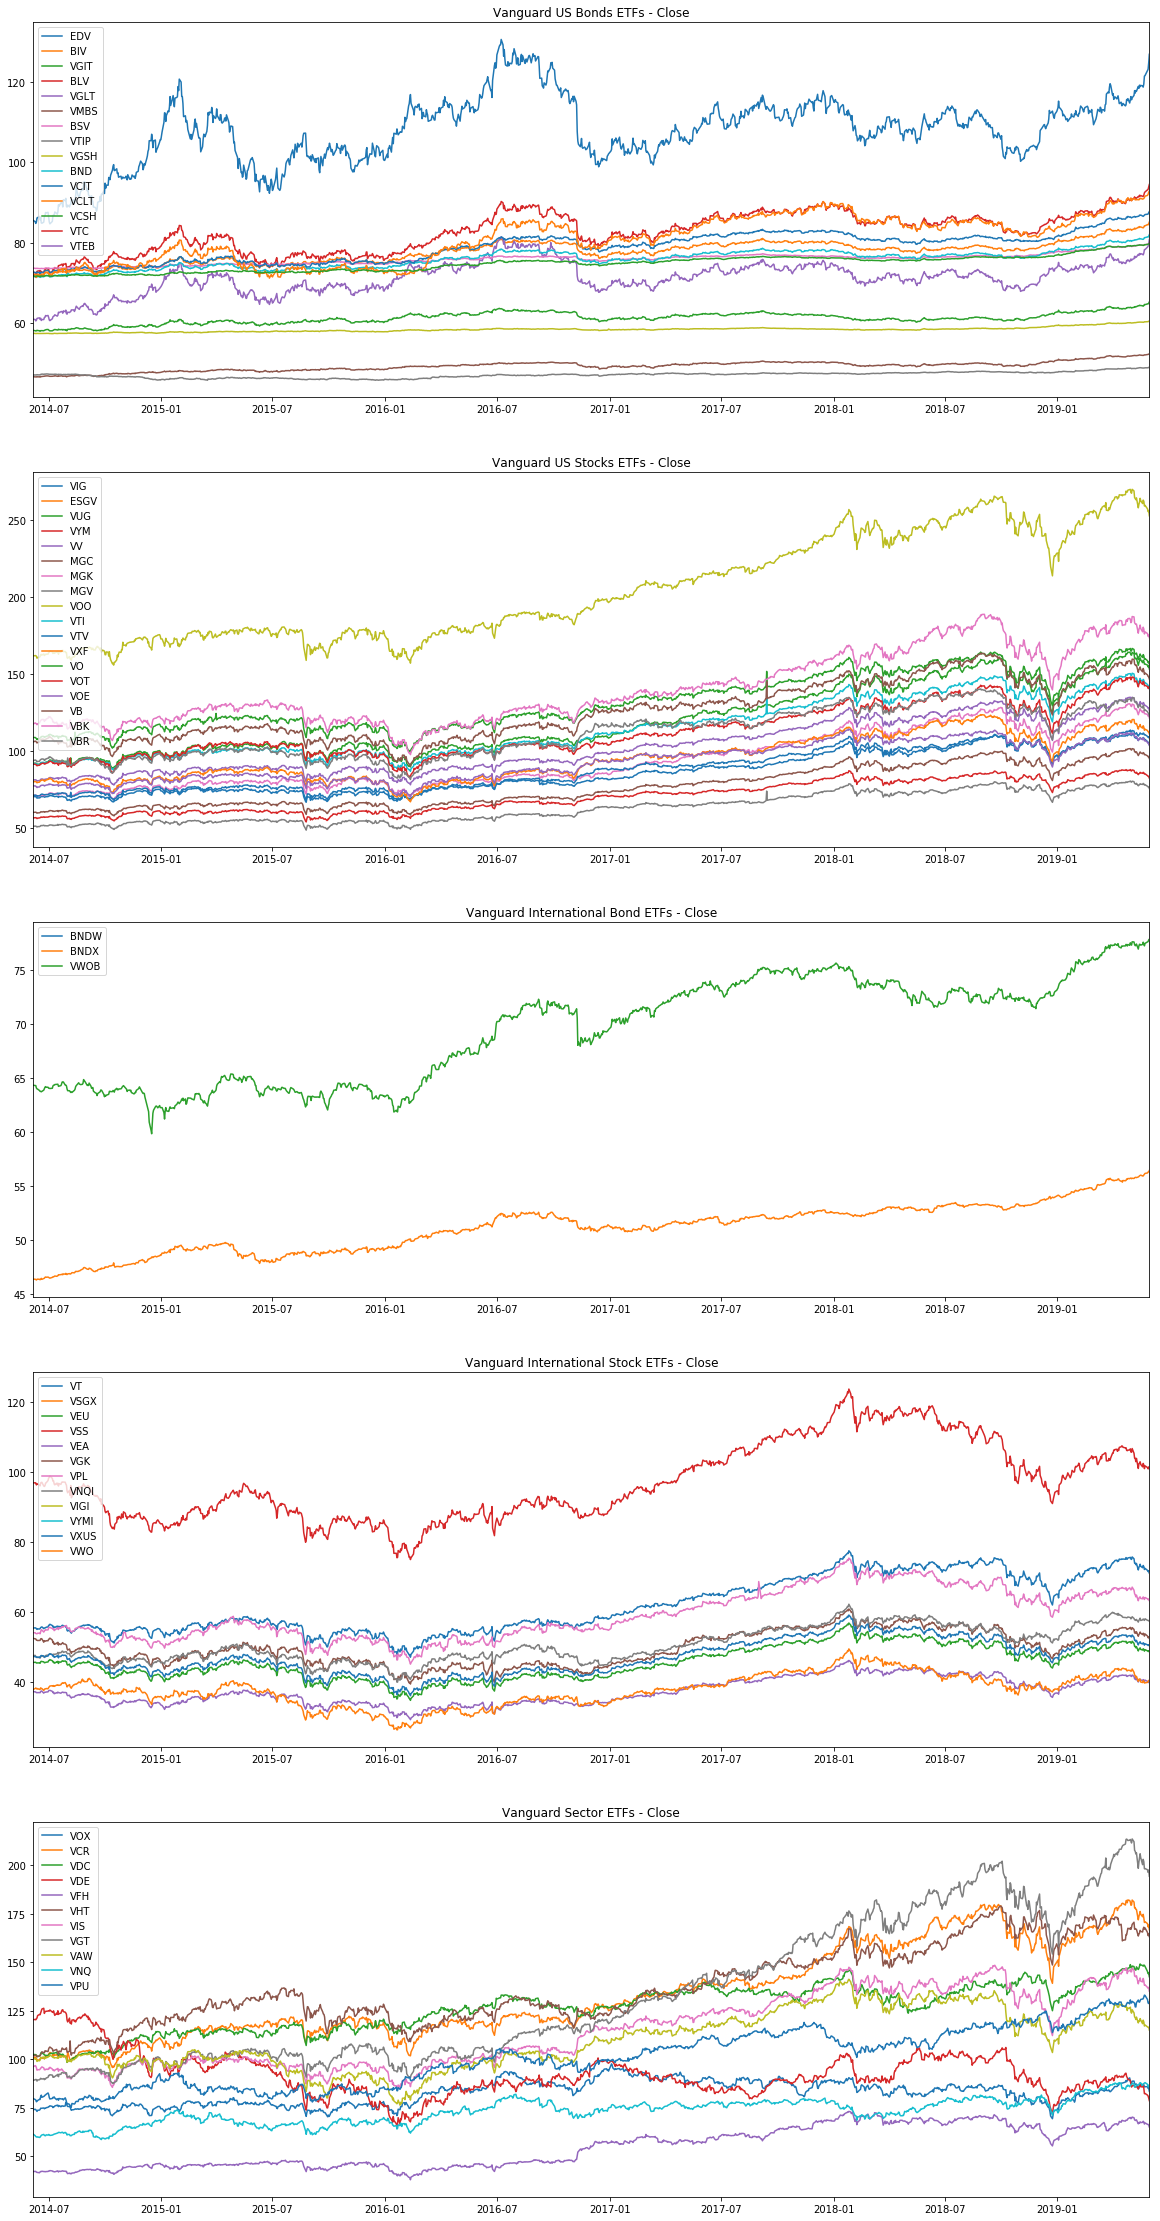

In [26]:
plt.figure(figsize=[20, 40])

# US Bonds
plt.subplot(5, 1, 1)
for i in etf_us_bonds_close.columns.tolist():
    plt.plot(etf_us_bonds_close[i])    
plt.title('Vanguard US Bonds ETFs - Close')
plt.legend(etf_us_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# US Stocks
plt.subplot(5, 1, 2)
for i in etf_us_stocks_close.columns.tolist():
    plt.plot(etf_us_stocks_close[i])    
plt.title('Vanguard US Stocks ETFs - Close')
plt.legend(etf_us_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Bonds
plt.subplot(5, 1, 3)
for i in etf_intl_bonds_close.columns.tolist():
    plt.plot(etf_intl_bonds_close[i])    
plt.title('Vanguard International Bond ETFs - Close')
plt.legend(etf_intl_bonds_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Stocks
plt.subplot(5, 1, 4)
for i in etf_intl_stocks_close.columns.tolist():
    plt.plot(etf_intl_stocks_close[i])    
plt.title('Vanguard International Stock ETFs - Close')
plt.legend(etf_intl_stocks_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Sectors
plt.subplot(5, 1, 5)
for i in etf_sectors_close.columns.tolist():
    plt.plot(etf_sectors_close[i])
plt.title('Vanguard Sector ETFs - Close')
plt.legend(etf_sectors_close.columns.tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

## Save The Data

Create a list of output files

In [27]:
output = ['etf_us_bonds.pickle', 
          'etf_us_stocks.pickle', 
          'etf_intl_bonds.pickle', 
          'etf_intl_stocks.pickle', 
          'etf_sectors.pickle']

Create a list of ETF data

In [28]:
data = [etf_us_bonds_close, 
        etf_us_stocks_close,
        etf_intl_bonds_close,
        etf_intl_stocks_close,
        etf_sectors_close]

Pickle

In [29]:
for i in range(len(output)):
    with open(output[i], 'wb') as f:
        pickle.dump(data[i], f)
    
    f.close()

## Conclusion
...